#### Introduction
This projects aims at predicting profits of food in respect to the population of a specific location

In [253]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#### Load the dataset

In [254]:
!pwd

/home/gigz/Documents/George/MachineLearning/machine-learning-projects/Price


In [255]:
with open('data/price_pop.txt', 'r') as file:
    names = ['price', 'population']
    price_pop_dataset = pd.read_csv(file,names=names)

In [256]:
dataset = price_pop_dataset
x = dataset['price']
y = dataset['population']
num_iters = 1500;
alpha = 0.01;

Text(0, 0.5, 'Price of in $10,000s')

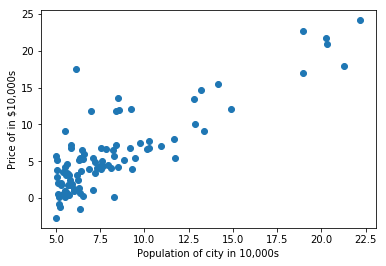

In [257]:
plt.scatter(x,y)
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Price of in $10,000s')

#### convert x and y to X AND Y matrices

#### Calculating the cost function
Formular is 
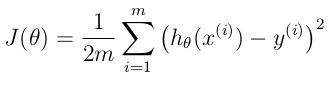

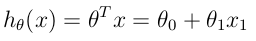

In [258]:
X = np.c_[np.ones(dataset.shape[0]),x]
Y = np.c_[y]

In [259]:
def compute_costfunction(X,y, theta=[[0],[0]]):
    m = y.size
    J = 0;
    predictions = X.dot(theta)
    J = 1/(2*m)*np.sum(np.square(predictions-y))
    return J

In [260]:
def gradient_decent(X, y, theta, alpha, num_iters):
    m = y.size
    J_history = np.zeros(num_iters);
    for iter in np.arange(num_iters):
        err=(X.dot(theta))-y
        theta = theta - alpha*(1/m)*(X.T.dot(err))
        J_history[iter] = compute_costfunction(X, y, theta)
    return (theta, J_history)

    

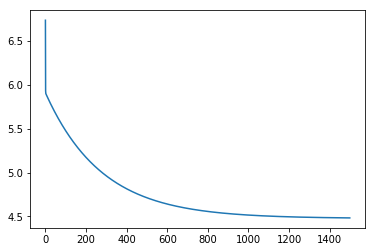

In [261]:
theta, Costj = gradient_decent(X,Y,[[0],[0]],  alpha, num_iters)
plt.plot(Costj);

/home/gigz/anaconda3/envs/chat-bot/lib/python3.5/site-packages/ipykernel_launcher.py:5: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """


Text(0, 0.5, 'Price of in $10,000s')

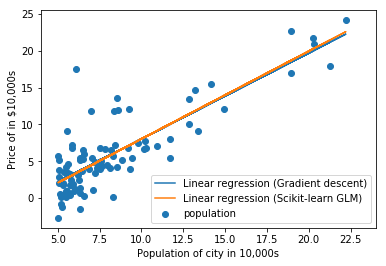

In [262]:
plt.scatter(x,y)
plt.plot(x,X.dot(theta), label='Linear regression (Gradient descent)')

regr = LinearRegression()
regr.fit(x.reshape(-1,1), y.ravel())
plt.plot(x, regr.intercept_+regr.coef_*x, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);
plt.xlabel('Population of city in 10,000s')
plt.ylabel('Price of in $10,000s')

#### Evaluate our model

In [290]:
theta.T.dot(X.T)

array([[ 3.49629916,  2.81700972,  6.30548288,  4.53797737,  3.20435866,
         6.14720751,  5.08990004,  6.37488144,  3.93496804,  2.2652037 ,
         3.03045403, 12.89006489,  3.05763028,  6.17694975,  2.94880867,
         2.64403819,  3.79407147,  2.35326405,  3.86895193,  4.61682347,
         3.58844178, 20.0118734 ,  2.7731545 ,  3.74823343,  2.8603984 ,
        18.46644329, 11.33180479,  9.14954083, 11.73769889, 22.26645183,
         2.49591017,  4.05533663,  7.15646085,  3.24168226,  5.94682646,
         5.62292763,  5.81246151,  2.90868581, 11.34113569,  3.78007512,
         2.67611315,  4.39719744, 10.02547896,  3.10393486,  5.49614404,
         4.64283335,  2.28339895,  3.1362431 , 10.01614806,  2.83322216,
         5.16431395,  2.56041001,  5.02866601,  5.23767815,  3.75604805,
         3.78649011,  3.68769922,  2.94764231,  7.22877531,  7.39603168,
         6.66332285,  2.41064908, 21.18873301, 13.75783848, 18.48277236,
         4.78874528,  6.04480089,  8.30859358,  2.7

0     17.59200
1      9.13020
2     13.66200
3     11.85400
4      6.82330
5     11.88600
6      4.34830
7     12.00000
8      6.59870
9      3.81660
10     3.25220
11    15.50500
12     3.15510
13     7.22580
14     0.71618
15     3.51290
16     5.30480
17     0.56077
18     3.65180
19     5.38930
20     3.13860
21    21.76700
22     4.26300
23     5.18750
24     3.08250
25    22.63800
26    13.50100
27     7.04670
28    14.69200
29    24.14700
        ...   
67     7.77540
68     1.01730
69    20.99200
70     6.67990
71     4.02590
72     1.27840
73     3.34110
74    -2.68070
75     0.29678
76     3.88450
77     5.70140
78     6.75260
79     2.05760
80     0.47953
81     0.20421
82     0.67861
83     7.54350
84     5.34360
85     4.24150
86     6.79810
87     0.92695
88     0.15200
89     2.82140
90     1.84510
91     4.29590
92     7.20290
93     1.98690
94     0.14454
95     9.05510
96     0.61705
Name: population, Length: 97, dtype: float64